<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/BAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np

A = [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tA = [-1, -1,-1] #tA = np.asmatrix([-1, 1]
B = [1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
tB = [-1, -1, 1]
C = [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
tC = [-1,1,-1] #tC = np.asmatrix([1, 1])
D = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1]
tD = [-1,1,1]
E = [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE = [1,-1,-1]
F =[1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1]
tF = [1, -1, 1]
G = [-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1]
tG = [1, 1, -1]
H = [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tH = [1, 1, 1]

X =[A,B,C,D,E,F,G,H]
#print(X)
Y = [tA,tB,tC,tD,tE,tF,tG,tH]
#print(Y)
#W = np.matmul(np.transpose(np.expand_dims(A, axis = 0)),tA) #+ np.matmul(np.transpose(C),tC)
#print(W)
#print(np.transpose(W))
#X.shape
#Y.shape
#A.shape
pair = []
for i in range (8):
  pair.append([X[i], Y[i]])
  
pair[1]

E1 = np.asarray(E)
E1.shape

(15,)

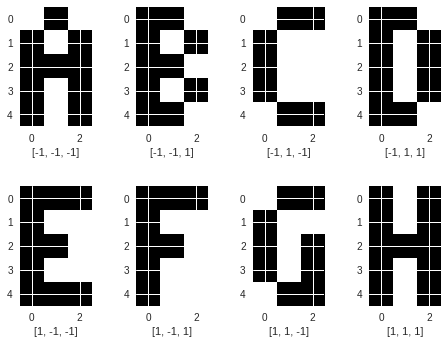

In [72]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i in range(4):
  axes[0,i].imshow(np.reshape(X[i],[5,3]))
  xlabel = Y[i]; axes[0,i].set_xlabel(xlabel)
  axes[1,i].imshow(np.reshape(X[i+4],[5,3]))
  xlabel = Y[i+4]; axes[1,i].set_xlabel(xlabel)



In [102]:
def BAM1(X,Y):
  X = np.asarray(X)
  Y = np.asarray(Y)
  n,m1 = X.shape
  n,m2 = Y.shape
  W=np.zeros([m1,m2])
  for i in range(n):
    W =W + np.matmul(np.transpose(np.asmatrix(X[i,:])),np.asmatrix(Y[i,:]))
  
  return W

W = BAM1(X,Y)
W


matrix([[ 2., -2.,  6.],
        [-2., -2., -2.],
        [ 6.,  2., -2.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [-4.,  0.,  4.],
        [ 0.,  0.,  0.],
        [ 2., -6.,  2.],
        [ 0.,  4.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [-2.,  2.,  2.],
        [ 0., -4.,  4.],
        [-2.,  2., -2.],
        [ 2.,  2., -6.]])

In [158]:
def BAM2(W, IN, OUT = []):
  IN = np.asarray(IN)
  m,n = W.shape
  if IN.shape == (m,):
    W = W
  elif IN.shape == (n,):
    W = np.transpose(W)
  m,n = W.shape
  x = np.expand_dims(IN, axis = 0)
    
  if OUT == []:
    y = np.sign(np.matmul(x,W)) 
  else:
    y = np.asarray(OUT)
    y = np.expand_dims(y, axis = 0)
  #x_out = np.sign(np.matmul(y, np.transpose(W)))
  x_in = np.matmul(y, np.transpose(W))
  for i in range(m):
    if x_in[0,i]>0:
      x_in[0,i] = 1
    elif x_in[0,i]<0:
      x_in[0,i] = -1
    elif x_in[0,i]==0:
      x_in[0,i] = x[0,i]
  x_out = x_in
    
  while np.max((x - x_out)) !=0 or np.min((x - x_out)) !=0:
    x = x_out 
    y_in = np.matmul(x,W)
    for i in range(n):
      if y_in[0,i]>0:
        y_in[0,i] = 1
      elif y_in[0,i]<0:
        y_in[0,i] = -1
      elif y_in[0,i]==0:
        y_in[0,i] = y[0,i]
    y = y_in
    
    #y = np.sign(np.matmul(x,W))
    x_in = np.matmul(y, np.transpose(W))
    for i in range(m):
      if x_in[0,i]>0:
        x_in[0,i] = 1
      elif x_in[0,i]<0:
        x_in[0,i] = -1
      elif x_in[0,i]==0:
        x_in[0,i] = x[0,i]
    x_out = x_in
    #x_out = np.sign(np.matmul(y, np.transpose(W)))
  return y, x

y,x = BAM2(W, H)
print (y,x)
print (tH)
#plt.imshow(np.reshape(y, [5,3]))

[[ 1. -1.  1.]] [[ 1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.]]
[1, 1, 1]


In [81]:
E = np.asarray(E)
print(E)
E1 = np.expand_dims(E, axis = 0)
t = np.matmul(E1,W)
print(t)
t1 = np.sign(t)
print(t1)

t2 = np.expand_dims(t1, axis = 0)
E2 = np.matmul(t1,np.transpose(W))
print(E2)
E3 = np.sign(E2)
print(E3)

[ 1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1]
[[ 14. -14.  -6.]]
[[ 1. -1. -1.]]
[[-2.  2.  6.  0.  0. -8.  0.  6. -4.  0.  0. -6.  0. -2.  6.]]
[[-1.  1.  1.  0.  0. -1.  0.  1. -1.  0.  0. -1.  0. -1.  1.]]


#(a)

###Test 1

In [114]:
TA = [-1, 1]
TC = [1, 1]
Wa = BAM1([A,C], [TA, TC])
print(Wa)

C1 = [-1, 0, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
yc1,xc1 = BAM2(Wa, C1)
print (yc1,xc1)
print('A:', A )
print('C:', C )

[[ 0. -2.]
 [ 0.  2.]
 [ 2.  0.]
 [ 0.  2.]
 [ 0. -2.]
 [-2.  0.]
 [ 0.  2.]
 [-2.  0.]
 [-2.  0.]
 [ 0.  2.]
 [ 0. -2.]
 [-2.  0.]
 [-2.  0.]
 [ 2.  0.]
 [ 0.  2.]]
[[1. 1.]] [[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]]
A: [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]


###Test 2

In [116]:
yc2,xc2 = BAM2(Wa, [1,0])
print (yc2,xc2)
print('C:', C )

[[ 0.  0.  1.  0.  0. -1.  0. -1. -1.  0.  0. -1. -1.  1.  0.]] [[1 0]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]


###Test 3

In [117]:
yc3,xc3 = BAM2(Wa, [1,0], C1)
print (yc3,xc3)
print('C:', C )

[[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]] [[1. 1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]


###Test 4

In [133]:
C2 = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
yc4,xc4 = BAM2(Wa, C2)
print (yc4,xc4)
print('C:', C )
print('A:', A )

[[1. 1.]] [[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
A: [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]


###Test 5

In [134]:
C2 = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
yc4,xc4 = BAM2(Wa, [1,0], C2)
print (yc4,xc4)
print('C:', C )
print('A:', A )

[[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]] [[1. 1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
A: [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]


#(b)

In [175]:
WAB=BAM1([A,B], [tA,tB])
print('WAB:',-np.sum(np.abs(WAB)))
WAC=BAM1([A,C], [tA,tC])
print('WAC:',-np.sum(np.abs(WAC)))
WAD=BAM1([A,D], [tA,tD])
print('WAD:',-np.sum(np.abs(WAD)))
WAE=BAM1([A,E], [tA,tE])
print('WAE:',-np.sum(np.abs(WAE)))

print('Wa:',-np.sum(np.abs(Wa)))
print('W:',-np.sum(np.abs(W)))

WAB: -52.0
WAC: -46.0
WAD: -38.0
WAE: -48.0
Wa: -30.0
W: -78.0


##Part III (Low Noise)

In [180]:
B2 = [0, 0, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
yb2,xb2 = BAM2(W, B2)
print (yb2,xb2)
print('B:', B )
print('tB:',tB )
C2 = [-1, 1, 0, 0, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
yc2,xc2 = BAM2(W, C2)
print (yc2,xc2)
print('C:', C )
print('tC:',tC )

E2 = [1, 1, 1, 1, -1, -1, 1, 0, -1, 1, -1, 0, 1, 1, 1]
ye2,xe2 = BAM2(W, E2)
print (ye2,xe2)
print('E:', E )
print('tE:',tE )

[[-1. -1.  1.]] [[ 1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.]]
B: [1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
tB: [-1, -1, 1]
[[ 1.  1. -1.]] [[-1. -1.  1.  0. -1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
tC: [-1, 1, -1]
[[ 1. -1. -1.]] [[-1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.]]
E: [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE: [1, -1, -1]


In [181]:
B3 = [0, 0, -1, 1, 0, 1, 1, 1, 0, 1, -1, 0, 1, 1, -1]
yb3,xb3 = BAM2(W, B3)
print (yb3,xb3)
print('B:', B )
print('tB:',tB )
C3 = [0, 1, 0, 0, -1, 0, 1, -1, -1, 1, -1, -1, -1,0, 1]
yc3,xc3 = BAM2(W, C3)
print (yc3,xc3)
print('C:', C )
print('tC:',tC )

E3 = [1, 1, 1, 1, -1, -1, 1, 0, -1, 1, -1, 0, 1, 1, 1]
ye3,xe3 = BAM2(W, E3)
print (ye3,xe3)
print('E:', E )
print('tE:',tE )

[[-1. -1.  1.]] [[ 1.  1. -1.  1.  0.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.]]
B: [1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
tB: [-1, -1, 1]
[[ 1.  1. -1.]] [[-1. -1.  1.  0. -1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
tC: [-1, 1, -1]
[[ 1. -1. -1.]] [[-1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.]]
E: [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE: [1, -1, -1]


###Hamming

In [264]:
import scipy.spatial.distance as dis
dis.hamming(H,G)

0.4

In [227]:
import scipy.spatial.distance as dis
hamm = np.zeros([8,8])
for i,j in range (8):
  hamm[i,j]=dis.hamming(X[i],X[j])

hamm



TypeError: ignored

In [214]:
W3 = BAM1([A,D,F,G],[tA,tD,tF,tG])
print(W3)
[x3A, y3A] = BAM2(W3,G)
print(x3A, y3A)

[[ 0.  0.  4.]
 [ 0.  0.  0.]
 [ 4.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-4.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -4.  0.]
 [-2.  2. -2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-2.  2. -2.]
 [-2. -2.  2.]
 [ 0.  4.  0.]
 [ 0.  0. -4.]]
[[ 1.  1. -1.]] [[-1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1]]
